In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    # RIP Training time
    raise SystemError('GPU device not found')
    print('Found GPU at: {}'.format(device_name))

In [3]:
TRAIN_DATA_ZIP_PATH = "vn_handwritten_images.zip"

In [2]:
import zipfile
with zipfile.ZipFile(TRAIN_DATA_ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall("vietnamese_hcr/raw")

In [4]:
import pathlib

current_path = pathlib.Path('./vietnamese_hcr/').absolute()

current_path

WindowsPath('d:/code-ml/DATN_Vietnamese_OCR/vietnamese_hcr')

In [5]:
import os

DATA_PATH = os.path.join(str(current_path), "data")
TEST_FOLDER = os.path.join(DATA_PATH, "test")
TRAIN_FOLDER = os.path.join(DATA_PATH, "train")

# our raw folders
RAW_FOLDER = os.path.join(str(current_path),"raw")

# label json files
TRAIN_JSON = os.path.join(RAW_FOLDER, "labels.json")

In [6]:
RAW_FOLDER

'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw'

In [7]:
TRAIN_JSON

'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\labels.json'

In [8]:
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
if not os.path.exists(TEST_FOLDER):
    os.makedirs(TEST_FOLDER)
if not os.path.exists(TRAIN_FOLDER):
    os.makedirs(TRAIN_FOLDER)

In [9]:
import json
# open these label jsons files
with open(TRAIN_JSON, 'r', encoding='utf8') as file:
    train_labels = json.load(file)

In [10]:
train_labels

{'1.jpg': 'Số 3 Nguyễn Ngọc Vũ, Hà Nội',
 '2.jpg': 'Số 30 Nguyên Hồng, Láng Hạ, Đống Đa, Hà Nội',
 '3.jpg': '58 Thái Thịnh, Đống Đa, Hà Nội',
 '4.jpeg': 'Số 370/8 khu phố 5B, phường Tân Biên, Biên Hòa, Đồng Nai',
 '5.jpg': 'Vĩnh Trung Plaza, B, 255-257 đường Hùng Vương, phường Vĩnh Trung',
 '6.jpg': 'Tòa nhà 34T, Hoàng Đạo Thúy, Hà Nội',
 '7.jpg': '40 Cát Linh, Đống Đa, Hà Nội',
 '8.jpg': 'phòng 101, tầng 1, lô 04-TT5B, khu đô thị Tây Nam Linh Đàm',
 '9.JPG': 'Nhà 87 ngõ 416 Đê La Thành',
 '10.JPG': 'Up coworking Space, 89 Láng Hạ, Hà Nội',
 '11.jpg': '192 Ngô Đức Kế, quận 1, Hồ Chí Minh',
 '12.jpg': 'số 5 Công Trường Mê Linh, phường Bến Nghé, quận 1',
 '13.jpg': '90A đường Mai Xuân Thưởng, tỉnh Gia Lai',
 '14.jpg': '96/7/12B Phạm Văn Đồng, thành phố Pleiku',
 '15.jpg': '168 Ngô Gia Tự, thành phố Hà Tĩnh',
 '0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 '0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 '

In [11]:
# find all characters in labels (so we don't blindly add chacters not even existed in our dataset)
char_list= set()
for label in train_labels.values():
    char_list.update(set(label))
char_list=sorted(char_list)

In [12]:
print(f'There are {len(char_list)} unique characters in this dataset.')

# show all possible labels characters
print("".join(char_list))


There are 140 unique characters in this dataset.
 #'()+,-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ


In [14]:
# convert the words to array of indexs based on the char_list
def encode_to_labels(txt):
    # encoding each output word into digits of indexes
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print("No found in char_list :", char)
        
    return dig_lst

In [18]:
# example
encode_to_labels("đồ án chuyên ngành 2023")

[91,
 119,
 0,
 74,
 57,
 0,
 48,
 52,
 64,
 68,
 79,
 57,
 0,
 57,
 51,
 73,
 57,
 52,
 0,
 12,
 10,
 12,
 13]

In [19]:
# find all image paths for train folder 1 and 2 and test folder
train_image_path = []

for item in pathlib.Path(RAW_FOLDER).glob('**/*'):
    if item.is_file() and item.suffix not in [".json"]:
        train_image_path.append(str(item))

In [20]:
train_image_path[:20]

['d:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0000_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0001_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0002_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0003_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0004_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0005_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0006_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0007_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0008_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0009_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0010_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0011_samples.png',
 'd:\\code-ml\\D

Preprocessing

- Find all widths and heights of images
- Use openCV to read image
- Preprocess images (like converting images to greyscale)
- Resize images so all images will have the same size
- Split your dataset into trainset and testset
- Build CRNN model with CTC loss
- Prediction
- Calculate metrics for SER, WER and CER

In [21]:
# Matching full absoluate paths and labels instead of filenames and labels 
dict_filepath_label={}
raw_data_path = pathlib.Path(os.path.join(RAW_FOLDER))
for item in raw_data_path.glob('**/*.*'):
    file_name=str(os.path.basename(item))
    if file_name != "labels.json":
      label = train_labels[file_name]
      dict_filepath_label[str(item)]=label

In [22]:
dict_filepath_label

{'d:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0002_samples.png': 'Số 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0003_samples.png': '42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận 1, TP Hồ Chí Minh',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0004_samples.png': '200 Phan Bội Châu, Phường Trường An, Thành phố Huế, Thừa Thiên - Huế',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0005_samples.png': '27A Hoàng Việt, Phường 4, Quận Tân Bình, TP Hồ Chí Minh',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0006_samples.png': 'Số 113 Đường Hưng Thái 

In [23]:
# find the maximum label length
label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

print(f'max label length: {max_label_len}')

max label length: 69


In [24]:
all_image_paths = list(dict_filepath_label.keys())

all_image_paths[:10]

['d:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0000_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0001_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0002_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0003_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0004_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0005_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0006_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0007_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0008_samples.png',
 'd:\\code-ml\\DATN_Vietnamese_OCR\\vietnamese_hcr\\raw\\data\\0009_samples.png']

In [25]:
import cv2

widths = []
heights = []
for img_path in all_image_paths:
    img = cv2.imread(img_path)
    (h, w, _) = img.shape
    heights.append(h)
    widths.append(w)

In [28]:
len(heights)

1838

In [26]:
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

# this information is useful for making decision for padding and resizing
(min_height, max_height, min_width, max_width)

(94, 376, 955, 2694)

In [27]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

train_image_paths, val_image_paths = train_test_split(all_image_paths, test_size=TEST_SIZE, random_state=42)

In [29]:
# Constants (we choose this number as we later discover that the output of our CNN is (1,9,512) from out input)
TIME_STEPS = 240

BUILD THE PIPELINE FOR THE IMAGES, definitely this is super basic pipeline

In [49]:
import numpy as np

# lists for training dataset
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []

RESIZE_MAX_WIDTH = 0

i = 0 

for train_img_path in train_image_paths:
    # read img and convert into gray img
    img = cv2.imread(train_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    h, w = img.shape

    img = cv2.resize(img, (int(118 / h * w), 118))

    h, w = img.shape

    if img.shape[1] > RESIZE_MAX_WIDTH:
        RESIZE_MAX_WIDTH = img.shape[1]

    img = np.pad(img, ((0, 0), (0, 2167 - w)), 'median')

    # BLur img
    img = cv2.GaussianBlur(img, (5, 5), 0)

    # threshold the img using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    # add channel dimension
    img = np.expand_dims(img, axis = 2)

    # normalize each img
    img = img / 255.0

    label = dict_filepath_label[train_img_path]

    orig_txt.append(label)
    train_label_length.append(len(label))

    # our time steps for valid input
    train_input_length.append(TIME_STEPS)
    training_img.append(img)

    # convert words to digits based on charlist
    training_txt.append(encode_to_labels(label))
    i = i + 1
    if i % 500 == 0:
        print(f"has processed trained {i} files")

print(RESIZE_MAX_WIDTH)



has processed trained 500 files
has processed trained 1000 files
2167


In [50]:
print(len(training_img))

1470


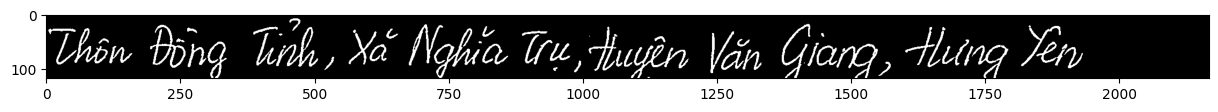

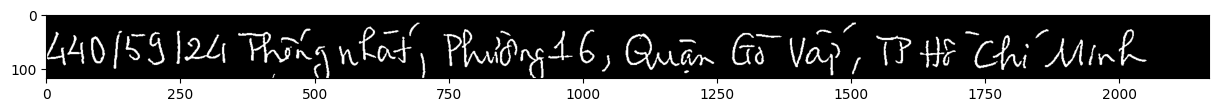

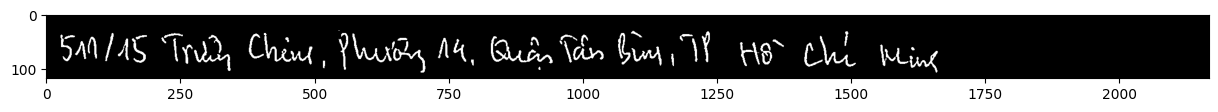

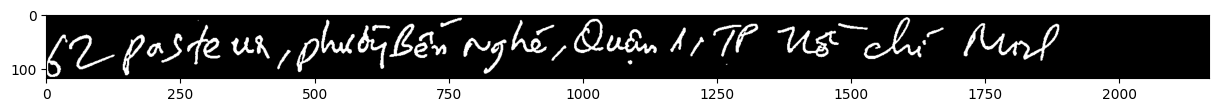

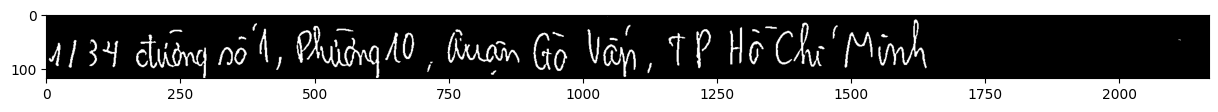

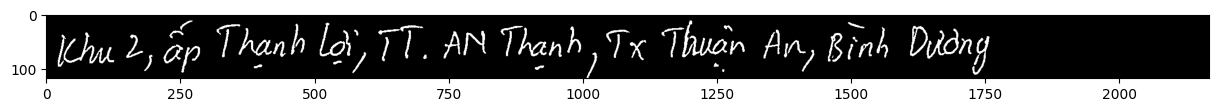

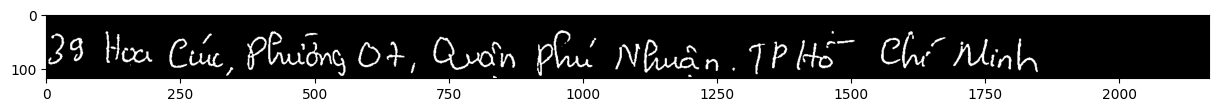

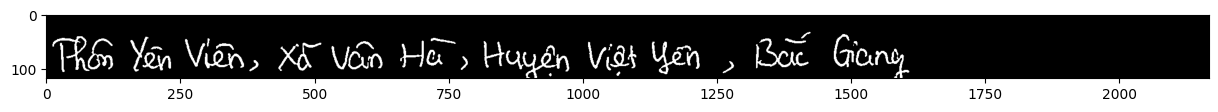

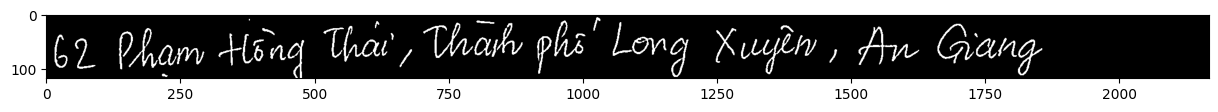

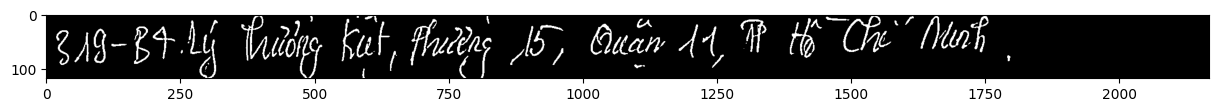

In [51]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize = (15, 2))
    plt.imshow(training_img[i][:, :, 0], cmap = "gray")
    plt.show()

In [54]:

#lists for validation dataset
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

i = 0

for val_img_path in val_image_paths:

    img = cv2.imread(val_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    h, w = img.shape

    img = cv2.resize(img,(int(118/h * w), 118))
    
    h, w = img.shape

    if img.shape[1] > RESIZE_MAX_WIDTH:
        RESIZE_MAX_WIDTH = img.shape[1]
        
    img = np.pad(img, ((0,0),(0, 2167 - w)), 'median')
    
    # YOUR PART: Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # YOUR PART: Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
    # add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[val_img_path]

    valid_orig_txt.append(label)   
    valid_label_length.append(len(label))

    # our time steps for valid input
    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)

    # convert words to digits based on charlist
    valid_txt.append(encode_to_labels(label))
    i = i + 1
    if i % 500 == 0:
        print (f"has processed test {i} files")
print(RESIZE_MAX_WIDTH)

2167


In [55]:
max_label_len = TIME_STEPS

In [65]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad each output label to maximum text length, remember we did that so that we keep training with rnn consistent?
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0)
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0)

In [67]:
train_padded_txt[0]

array([ 40,  52,  84,  57,   0,  90, 119,  57,  51,   0,  40, 114,  57,
        52,   6,   0,  44,  76,   0,  34,  51,  52,  92,  46,   0,  40,
        61, 128,   6,   0,  28,  64,  68, 113,  57,   0,  42,  89,  57,
         0,  27,  53,  46,  57,  51,   6,   0,  28,  96,  57,  51,   0,
        45,  79,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   